## Assignment 1: Investigating the San-Francisco crime scene using data on Police Department Incident Reports over the years 2003-2017

---

_Course: 02806 Social Data Analysis and Visualization_ <br>
_Course responsible: Sune Lehmann Jørgensen_ <br>
_DTU - Technical University of Denmark_

---

## Table of Contents
- [Introduction of the topic and dataset](#intro)
- [Analysis 1: Temporal evolution of focus crimes](#analysis1)
- [Analysis 2: Visualizing geographical data using Folium library](#analysis2)
- [Analysis 3: Univariate (single-variable) plots for Crime data](#analysis3)
- [Analysis 4: Performing Machine Learning using Decision Trees for real-world Crime data](#analysis4)

---
<a id='intro'></a>
## Introduction of the topic and dataset

### Introduction to the SF Crime Reports dataset *(reference: https://data.sfgov.org, accessed 1 March 2019)*

The SF police department is responsible for releasing the Police Department Incident Reports, to which both officers and individuals have contributed by gathering and performing online reporting of non-emergency cases of criminality. The data contains 2.215.024 reports from 1 January 2003 up to 5 May 2018, with 13 different columns as attributes. The details of this dataset will be shown through visualizations and various methods of analysis, which will be presented within the assignment parts below.

---
<a id='analysis1'></a>
## Analysis 1: Temporal evolution of focus crimes

_Police-chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below._

* **Create the bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
import os
import time

from folium import plugins
from scipy import stats
from datetime import datetime
from sklearn import tree

%matplotlib inline

In [2]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT',
'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 
'DISORDERLY CONDUCT'])

In [3]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv') # load the csv data into pandas dataframe

In [4]:
df.head() # displaying the top rows of the pandas dataframe

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


In [5]:
df['Year'] = df.Date.apply(lambda text: text.split('/')[2]) # add a column year based on the column Date

In [6]:
# print total number of arrests per year
df.groupby(df.Year).IncidntNum.count()

Year
2003    149176
2004    148148
2005    142186
2006    137853
2007    137639
2008    141311
2009    139860
2010    133523
2011    132697
2012    140847
2013    152806
2014    150128
2015    156526
2016    150883
2017    154773
2018     46668
Name: IncidntNum, dtype: int64

In [7]:
df_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'Year']).size().unstack()
df_grouped.drop(columns = ['2018'], inplace = True)
df_grouped

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Category,,,,,,,,,,,,,,,
ASSAULT,13461,12899,11601,12449,12518,12681,12284,12387,12279,12181,12580,12402,13115,13603,13655
BURGLARY,6047,6753,7071,7004,5454,5679,5379,4966,4987,6243,6195,6066,5931,5813,5857
DISORDERLY CONDUCT,886,814,687,521,581,789,956,827,762,704,464,345,551,659,399
DRIVING UNDER THE INFLUENCE,289,244,196,266,313,408,579,458,470,421,448,381,430,378,299
DRUG/NARCOTIC,9917,9897,8533,9069,10560,11648,11950,9205,6935,6444,6775,5408,4251,4246,3308
DRUNKENNESS,662,600,636,703,671,710,804,706,652,644,954,620,576,465,339
LARCENY/THEFT,26393,24505,25319,27352,25770,25807,25585,24446,25905,30976,36412,38003,42068,40449,47826
PROSTITUTION,1952,1527,1103,1290,1873,1673,1468,1299,1094,690,692,449,374,642,527
ROBBERY,3204,3380,3566,4131,4027,4229,3578,3324,3376,3955,4196,3420,3759,3300,3351


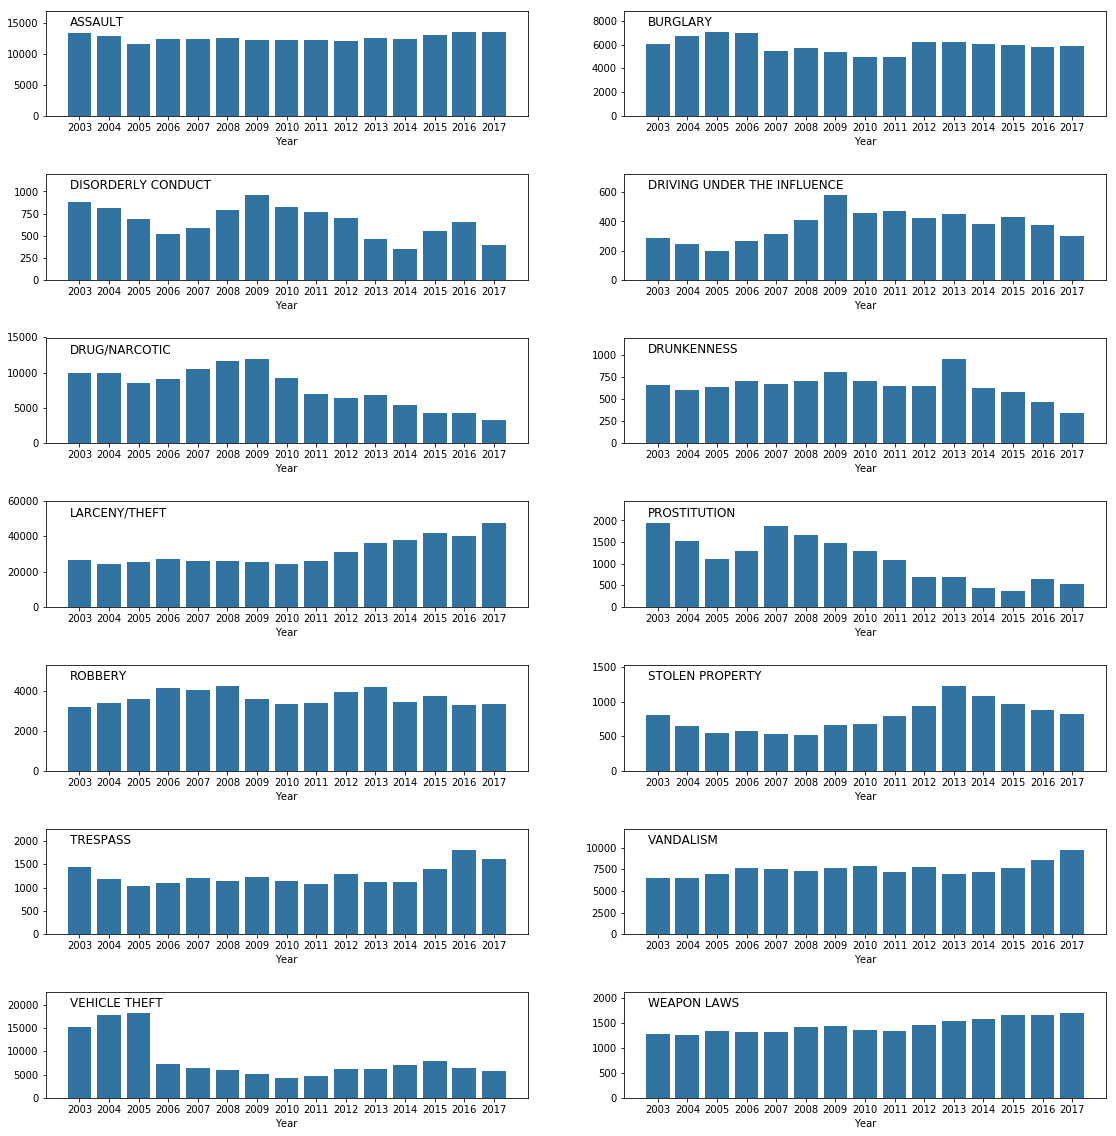

In [8]:
fig = plt.figure(figsize=(19, 20))

for plot_index in range(1, 15):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(7, 2, plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.55)
    
    ax = sns.barplot(x = df_grouped.iloc[plot_index - 1].index, y = df_grouped.iloc[plot_index - 1].values, color = sns.color_palette()[0])
    plt.margins(y = 0.25, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_grouped.iloc[plot_index - 1].name, y = 0.80, x = 0.05, loc = 'left') # set indentation 'left' and x, y added/subtracted, compared to the default values

Note: _The range of the y-axis has not been standardized across all plots, so the plots are not directly comparable as per the plot seen above._

In [9]:
# print the yearly numbers for one of the crime types to compare with the plot above
df_grouped.loc['ASSAULT']

Year
2003    13461
2004    12899
2005    11601
2006    12449
2007    12518
2008    12681
2009    12284
2010    12387
2011    12279
2012    12181
2013    12580
2014    12402
2015    13115
2016    13603
2017    13655
Name: ASSAULT, dtype: int64

__*The numbers seem to be in accordance with the plot for `'ASSAULT'`.*__
***

<a id='analysis2'></a>
## Analysis 2: Visualizing geographical data using Folium library

* **Select a couple of months of data (for example, June-July 2016) for `'DRUG/NARCOTIC'` and the same couple of months for `'LARCENY/THEFT'`.** 
    * _Draw a little circle for each arrest in the category `'DRUG/NARCOTIC'` for your time period._
    * _Draw a little circle for each arrest in the category `'LARCENY/THEFT'` for the time period._

_Note: There is an issue with Folium and plotting lots of points, so if you have trouble plotting simply select a shorter time period; you should be able to plot a couple of thousand points._

In [10]:
# The file is already loaded from previous exercise
df.head(1)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000,2015


In [11]:
# define the latitude and longitude coordinates of San Francisco
lan = 37.77919
lon = -122.41914

# plot San Francisco's map
m = folium.Map([lan, lon], zoom_start=13)
m

_Screenshot image from imgur in case the map plot above does not show:_


![Image of map plot](https://i.imgur.com/VnmxM2M.png)

In [12]:
# Converting date to 'datetime' format for easier manipulation
# note: may take a longer time to run

df['Date'] = pd.to_datetime(df['Date'])
df.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000,2015
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074,2015


In [13]:
#select the time period from June 2016 to July 2016
start_date = '2016-06-01'
end_date = '2016-07-31'

# create new dataframe with data from the specified period
df_part = df[(df['Date'] > start_date) & (df['Date'] <= end_date)]

# Sort the crime data by two categories: DRUG/NARCOTIC and LARCENY/THEFT within the time period
df_DN = df_part[(df_part['Category'] == 'DRUG/NARCOTIC') & (df_part['Resolution'] == 'ARREST, BOOKED')]
df_LT = df_part[(df_part['Category'] == 'LARCENY/THEFT') & (df_part['Resolution'] == 'ARREST, BOOKED')]

In [14]:
# check the 'DRUG/NARCOTIC' data (for data understanding purposes)
df_DN.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year
1838354,160474412,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Friday,2016-06-10,23:18,CENTRAL,"ARREST, BOOKED",1000 Block of SUTTER ST,-122.417673,37.788124,"(37.788124273443195, -122.41767292362611)",16047441216710,2016
1840586,160591044,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Thursday,2016-07-21,09:00,SOUTHERN,"ARREST, BOOKED",200 Block of 7TH ST,-122.408649,37.777311,"(37.777311027403265, -122.4086487351704)",16059104416650,2016


In [15]:
# check the 'LARCENY/THEFT' data (for data understanding purposes)
df_LT.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year
1843217,140558020,LARCENY/THEFT,PETTY THEFT WITH PRIOR,Thursday,2016-07-07,09:39,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.779944405204645, -122.41431785788087)",14055802006365,2016
1844244,160524932,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Tuesday,2016-06-28,13:25,SOUTHERN,"ARREST, BOOKED",700 Block of MISSION ST,-122.403070,37.785269,"(37.78526863090873, -122.40307000084677)",16052493206363,2016


In [16]:
# create empty map with focus on SF
sfmap = folium.Map([lan, lon], zoom_start=13)

# mark each arrest which is categorized as 'DRUG/NARCOTIC' with a point and plot it on the map
for index, row in df_DN.iterrows():
    folium.CircleMarker([row['Y'], row['X']], # note: in the dataframe, Y is lat and X is long
                        radius=5,
                        popup=row['Resolution'],
                        fill_color="#3db7e4", # blue color for 'DRUG/NARCOTIC' points
                       ).add_to(sfmap)
    
# mark each arrest which is categorized as 'LARCENY/THEFT' with a point and plot it
for index, row in df_LT.iterrows():
    folium.CircleMarker([row['Y'], row['X']], # note: in the dataframe, Y is lat and X is long
                        radius=5,
                        popup=row['Resolution'],
                        color="red", fill_color="red", # red color for 'LARCENY/THEFT' points
                        ).add_to(sfmap)
    
sfmap # show map with points

_Screenshot image from imgur in case the map plot above does not show:_


![img](https://i.imgur.com/IYk7YIU.png)

#### Note that the <font color='blue'>blue points</font> on the map above correspond to arrests affiliated with the `'DRUG/NARCOTIC'` category. <br> <br> The <font color='red'>red points</font> on the map correspond to arrests affiliated with the `'LARCENY/THEFT'` category.
<br>

--- 
* **Now, let's play with various heatmaps:**
    * _Create a heatmap of all arrests for `'DRUG/NARCOTIC'` during June-July 2016 (with the heatmap you should be able to use the full period). <br> Play with parameters to get plots you like._
    * _Create a heatmap of all arrests for `'LARCENY/THEFT'` during June-July 2016 (with the heatmap you should be able to use the full period)._

In [17]:
# convert to (n, 2) nd-array format for heatmap
df_DN_Arr = df_DN[['Y', 'X']].values
m1 = folium.Map([lan, lon], zoom_start=13)

# plot heatmap for 'DRUG/NARCOTIC'-related arrests
heat=plugins.HeatMap(list(df_DN_Arr), radius=20)
m1 = m1.add_child(heat)
m1

_Screenshot image from imgur in case the map plot above does not show:_


![img](https://i.imgur.com/bw1BxEp.png)

In [18]:
# convert to (n, 2) nd-array format for heatmap
df_LT_Arr = df_LT[['Y', 'X']].values

# plot heatmap for 'LARCENCY/THEFT' related arrests
m2 = folium.Map([lan, lon], zoom_start=13)
heat=plugins.HeatMap(list(df_LT_Arr), radius=20)
m2.add_child(heat)
m2

_Screenshot image from imgur in case the map plot above does not show:_


![img](https://i.imgur.com/SXwfSfT.png)

__*Comment on the differences. What can you see using the scatter-plots that you can't see using the heatmaps? And vice versa: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?*__

The heatmap clearly shows the geographic concentration of arrests (_i.e. the proportion of the arrests happening for the specific type of crime all over the city_), whereas the scatter plot shows the specific number of arrests being made at the locations (_perhaps except for locations where many arrests happen, where it becomes hard to distinguish between the points_). 
The heatmap cannot inform viewers of the actual number of crimes happening in one area, as it can only show proportional coloring relative to the total amount of crime within the city.

__*Comment on the effect on the various parameters for the heatmaps. How do they change the picture?*__

_By changing some parameters, the map will look different:_

* By increasing `min_opacity`, the center of heat will expand;
* `max_zoom` and `max_val` control the maximum intensity of the points; 
* `radius` defines the radius of each point (_a too small value, such as 1, might be invisible_);
* Increasing or decreasing the amount of `blur` will smoothen the edges of each point;
* `gradient` indicates the color gradient configuration, which can be changed based on different needs for visualizations;
***

<a id='analysis3'></a>
## Analysis 3: Univariate (_single-variable_) plots for Crime data

* **First, create a jitter-plot based on SF Police data.**

_Suneman's hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times **during a single hour** (e.g. 13-14)._

In [19]:
print("current directory =>", os.getcwd()) # check the current directory

# check if the needed CSV file is in the current directory)
print("files in directory =>")
for file in os.listdir(os.getcwd()):
    if ".csv" in file and "Police" in file:
        print("File found! =>", file)
        df = pd.read_csv(file) #load the file
        break
        
df.head(2) #print the head of the file

current directory => C:\Users\XPS\Documents\Jupyter Notebook Files\02608 - Social Data Analysis and Visualisations\L4 - Assignment 1
files in directory =>
File found! => Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074


In [20]:
#check crime types by listing unique values in the df['Category'] column
for crimetype in sorted(df.Category.unique()):
    print(crimetype)

ARSON
ASSAULT
BAD CHECKS
BRIBERY
BURGLARY
DISORDERLY CONDUCT
DRIVING UNDER THE INFLUENCE
DRUG/NARCOTIC
DRUNKENNESS
EMBEZZLEMENT
EXTORTION
FAMILY OFFENSES
FORGERY/COUNTERFEITING
FRAUD
GAMBLING
KIDNAPPING
LARCENY/THEFT
LIQUOR LAWS
LOITERING
MISSING PERSON
NON-CRIMINAL
OTHER OFFENSES
PORNOGRAPHY/OBSCENE MAT
PROSTITUTION
RECOVERED VEHICLE
ROBBERY
RUNAWAY
SECONDARY CODES
SEX OFFENSES, FORCIBLE
SEX OFFENSES, NON FORCIBLE
STOLEN PROPERTY
SUICIDE
SUSPICIOUS OCC
TREA
TRESPASS
VANDALISM
VEHICLE THEFT
WARRANTS
WEAPON LAWS


**The crime-type category _`KIDNAPPING`_ has been chosen as the focus crime for this exercise.**

In [21]:
# get all robbery incidents as subset
df_kidnap = df.loc[df['Category'] == "KIDNAPPING"]
df_kidnap.shape # check how many rows the subset have, i.e. how many robbery incidents have been registered

(5346, 13)

Looks like there are **5.346** registered robberies.

In [22]:
df_kidnap.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
238,150100213,KIDNAPPING,FALSE IMPRISONMENT,Monday,02/02/2015,10:20,INGLESIDE,NONE,200 Block of BLYTHDALE AV,-122.420557,37.710895,"(37.7108945814914, -122.420556751442)",15010021326142
493,150102463,KIDNAPPING,FALSE IMPRISONMENT,Monday,02/02/2015,21:30,NORTHERN,"ARREST, BOOKED",3000 Block of BUCHANAN ST,-122.432232,37.797991,"(37.7979906413415, -122.432231936901)",15010246326142
762,150104754,KIDNAPPING,"KIDNAPPING, JUVENILE VICTIM",Tuesday,02/03/2015,15:59,TENDERLOIN,NONE,8TH ST / MARKET ST,-122.414744,37.778719,"(37.778719262789, -122.414743835382)",15010475415021


In [23]:
# add a Datetime column based on the date and time column in the dataset
df_kidnap['Datetime'] = pd.to_datetime(df_kidnap['Date'] + ' ' + df_kidnap['Time'])

C:\Users\XPS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
# extract all kidnapping-related data registered between midnight and 1 AM on sundays
df_kidnap_sun = df_kidnap.loc[(df_kidnap['DayOfWeek'] == "Sunday") & (df_kidnap['Category'] == "KIDNAPPING")].set_index("Datetime").between_time("00:00", "01:00")

In [25]:
# reset the index and sort values to have them in the right order on the jitter plot
df_kidnap_sun = df_kidnap_sun.reset_index().sort_values(by="Time")

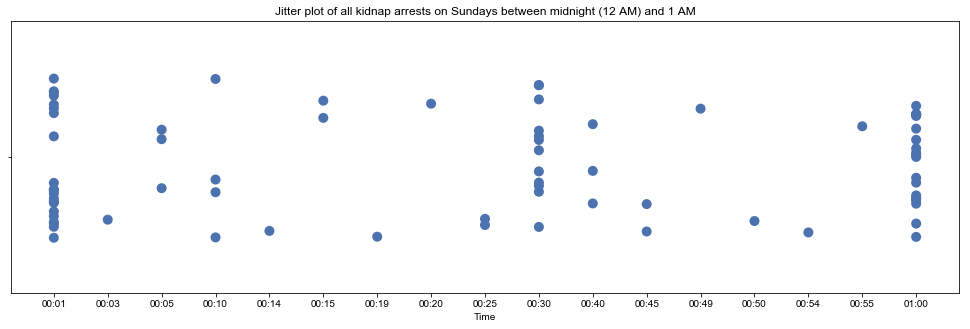

In [26]:
# create jitter plot for kidnap arrests on sundays between midnight (12 AM) and 1 AM
plt.clf
fig, ax = plt.subplots(figsize=(17,5)) # set figuresize
sns.set(style="whitegrid")

ax = sns.stripplot(ax=ax, data=df_kidnap_sun, x=df_kidnap_sun["Time"], jitter=0.3, size=10)
plt.title("Jitter plot of all kidnap arrests on Sundays between midnight (12 AM) and 1 AM")
plt.show()

_It seems as though most arrests affiliated with kidnapping are registered either at 00:01, 00:30 or 01:00. Besides these points, most arrests fall onto points in time that are multiples of five minute intervals. In reality, it is very unlikely that most arrests happen only every 5th minute set, which indicates that many police officers round up or down the time when noting the time of an arrest._

---

* __We will play around with histograms. Police-chief Suneman thinks the GPS data could be interesting to see this way:__
    * _Pick two crime-types with different geographical patterns and a suitable time-interval for each (between 1000 and 10000 points in your histogram)_
    * _Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF._

In [27]:
df_kidn_runaw = df[df.Category.isin(['KIDNAPPING', 'RUNAWAY'])]

In [28]:
df_kidn_runaw.drop(df_kidn_runaw[(df_kidn_runaw.Category == 'KIDNAPPING') & (df_kidn_runaw.Y > 40)].index, inplace = True)

C:\Users\XPS\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
bin_edges_kidn = pd.np.histogram(df_kidn_runaw[df_kidn_runaw.Category == 'KIDNAPPING'].Y, bins = 50)[1]
bin_edges_runaw = pd.np.histogram(df_kidn_runaw[df_kidn_runaw.Category == 'RUNAWAY'].Y, bins = 50)[1]

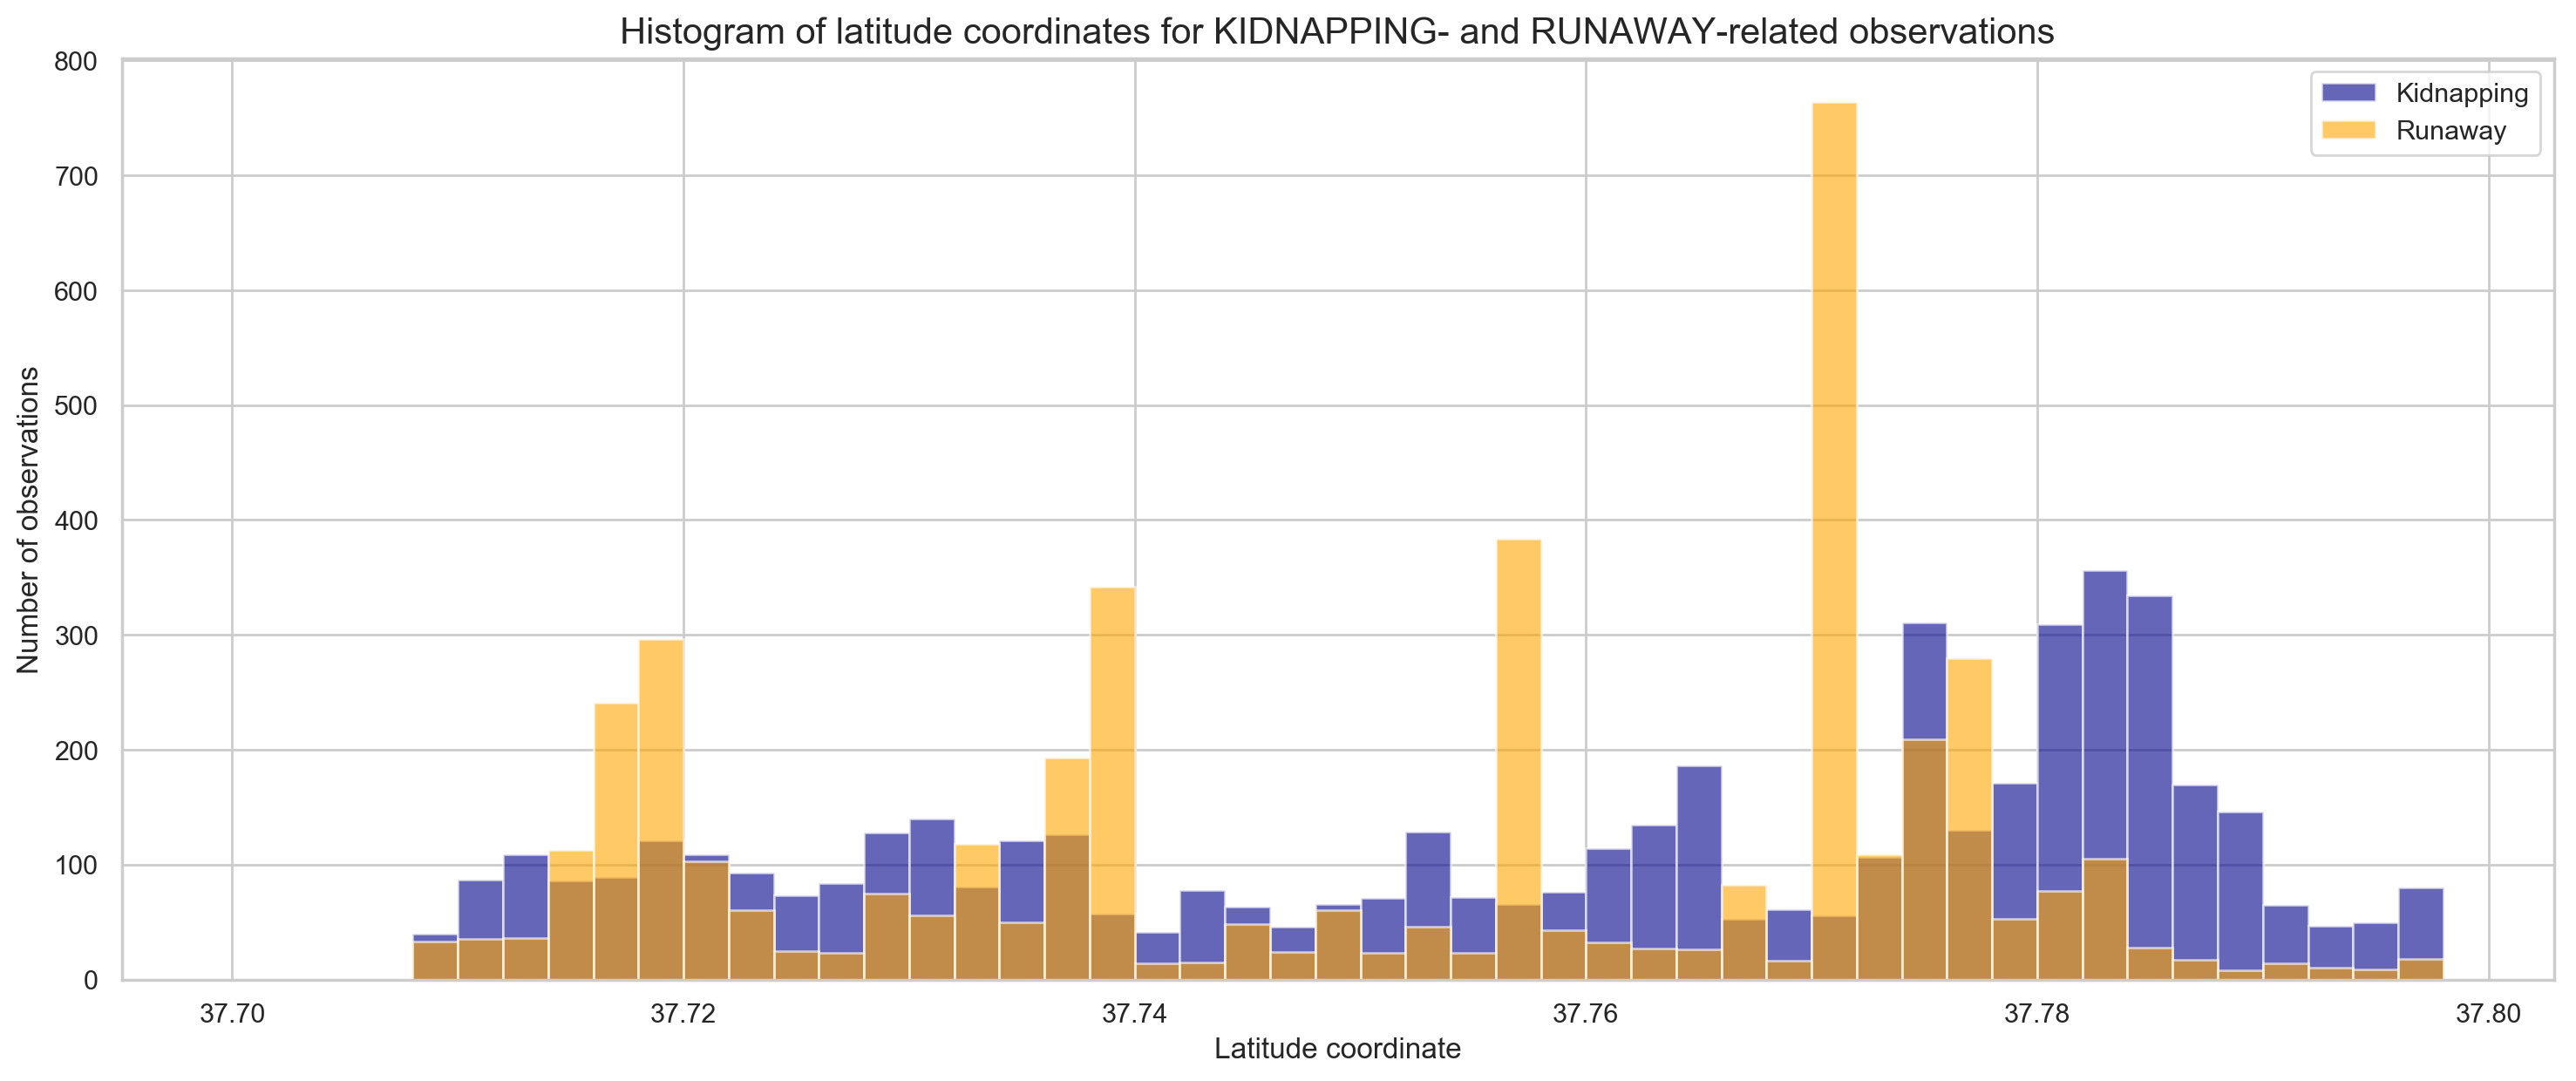

In [30]:
plt.figure(figsize = [18, 7], dpi=200)

ax = plt.hist(df_kidn_runaw[df_kidn_runaw.Category == 'KIDNAPPING'].Y, bins = pd.np.arange(37.7, 37.8, 0.002), alpha = 0.6, color='darkblue');
ax = plt.hist(df_kidn_runaw[df_kidn_runaw.Category == 'RUNAWAY'].Y, bins = pd.np.arange(37.7, 37.8, 0.002), alpha = 0.6, color='orange');
plt.legend(labels = ['Kidnapping', 'Runaway'])
plt.title("Histogram of latitude coordinates for KIDNAPPING- and RUNAWAY-related observations", size=15)
plt.xlabel("Latitude coordinate")
plt.ylabel("Number of observations")
plt.show()

_It seems like `KIDNAPPING` observations are more evenly spread out in terms of latitude, although there seems to be a clustering around `Y=37.89`;_

_Interestingly, `RUNAWAY` observations seem much more condensed around 4 evenly spaced spikes with a *very* high global peak around: `Y=37.77`;_

---
* __Next up is the creation of a _kernel density plot_, with the data used to create the jitterplot:__

C:\Users\XPS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


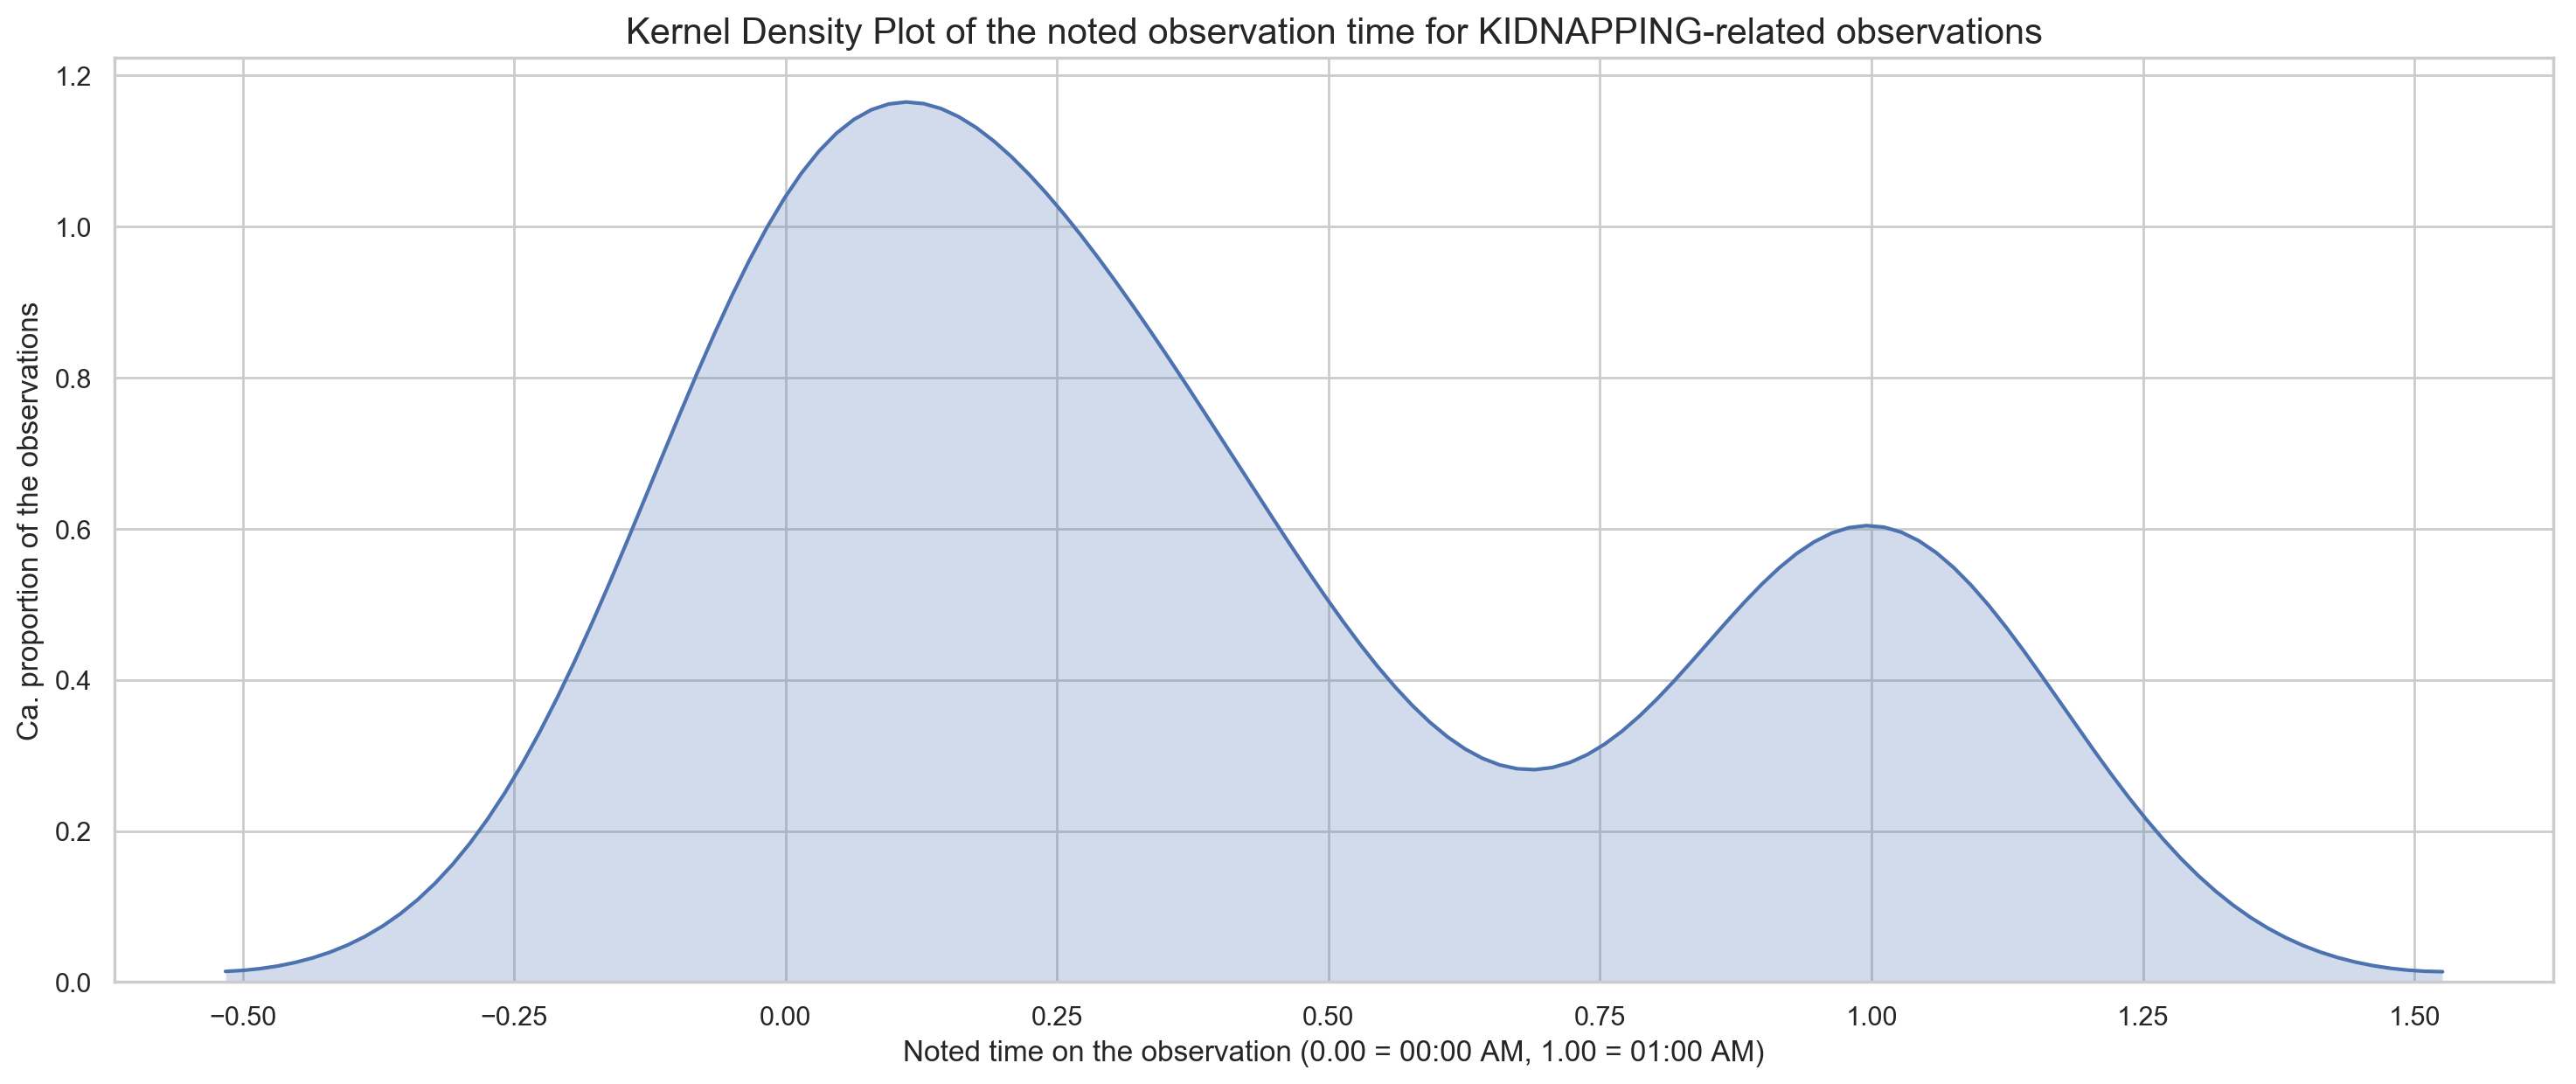

In [31]:
plt.clf # clear figure
plt.figure(figsize = [18, 7], dpi=200)

sns.kdeplot([x.replace(":",".") for x in df_kidnap_sun["Time"].values], shade=True) # replace : with . to allow seaborn to work with the data
plt.title("Kernel Density Plot of the noted observation time for KIDNAPPING-related observations", size=15)
plt.xlabel("Noted time on the observation (0.00 = 00:00 AM, 1.00 = 01:00 AM)")
plt.ylabel("Ca. proportion of the observations")
plt.show()

_This kernel density plot seems to fit well with the data; it peaks at somewhere between 00:01 and 00:30 as well as at 01.00._

---
* __Now grab 25 random time-points from the dataset you've just plotted and create the same _kernel density plot_ once again.__ <br> _Does this shed light on why Suneman thinks KDEs can be misleading?_

In [58]:
df_random_samples = df_kidnap_sun.sample(25) # take 25 random samples
df_random_samples = [x.replace(":",".") for x in df_random_samples["Time"].values] # replace : with . to allow seaborn to work with the data
print(df_random_samples)

['00.01', '00.01', '00.01', '00.05', '00.55', '01.00', '00.01', '00.30', '00.10', '01.00', '00.45', '00.01', '00.30', '00.01', '00.10', '00.30', '00.49', '00.45', '00.01', '01.00', '00.01', '00.30', '00.50', '00.14', '00.01']


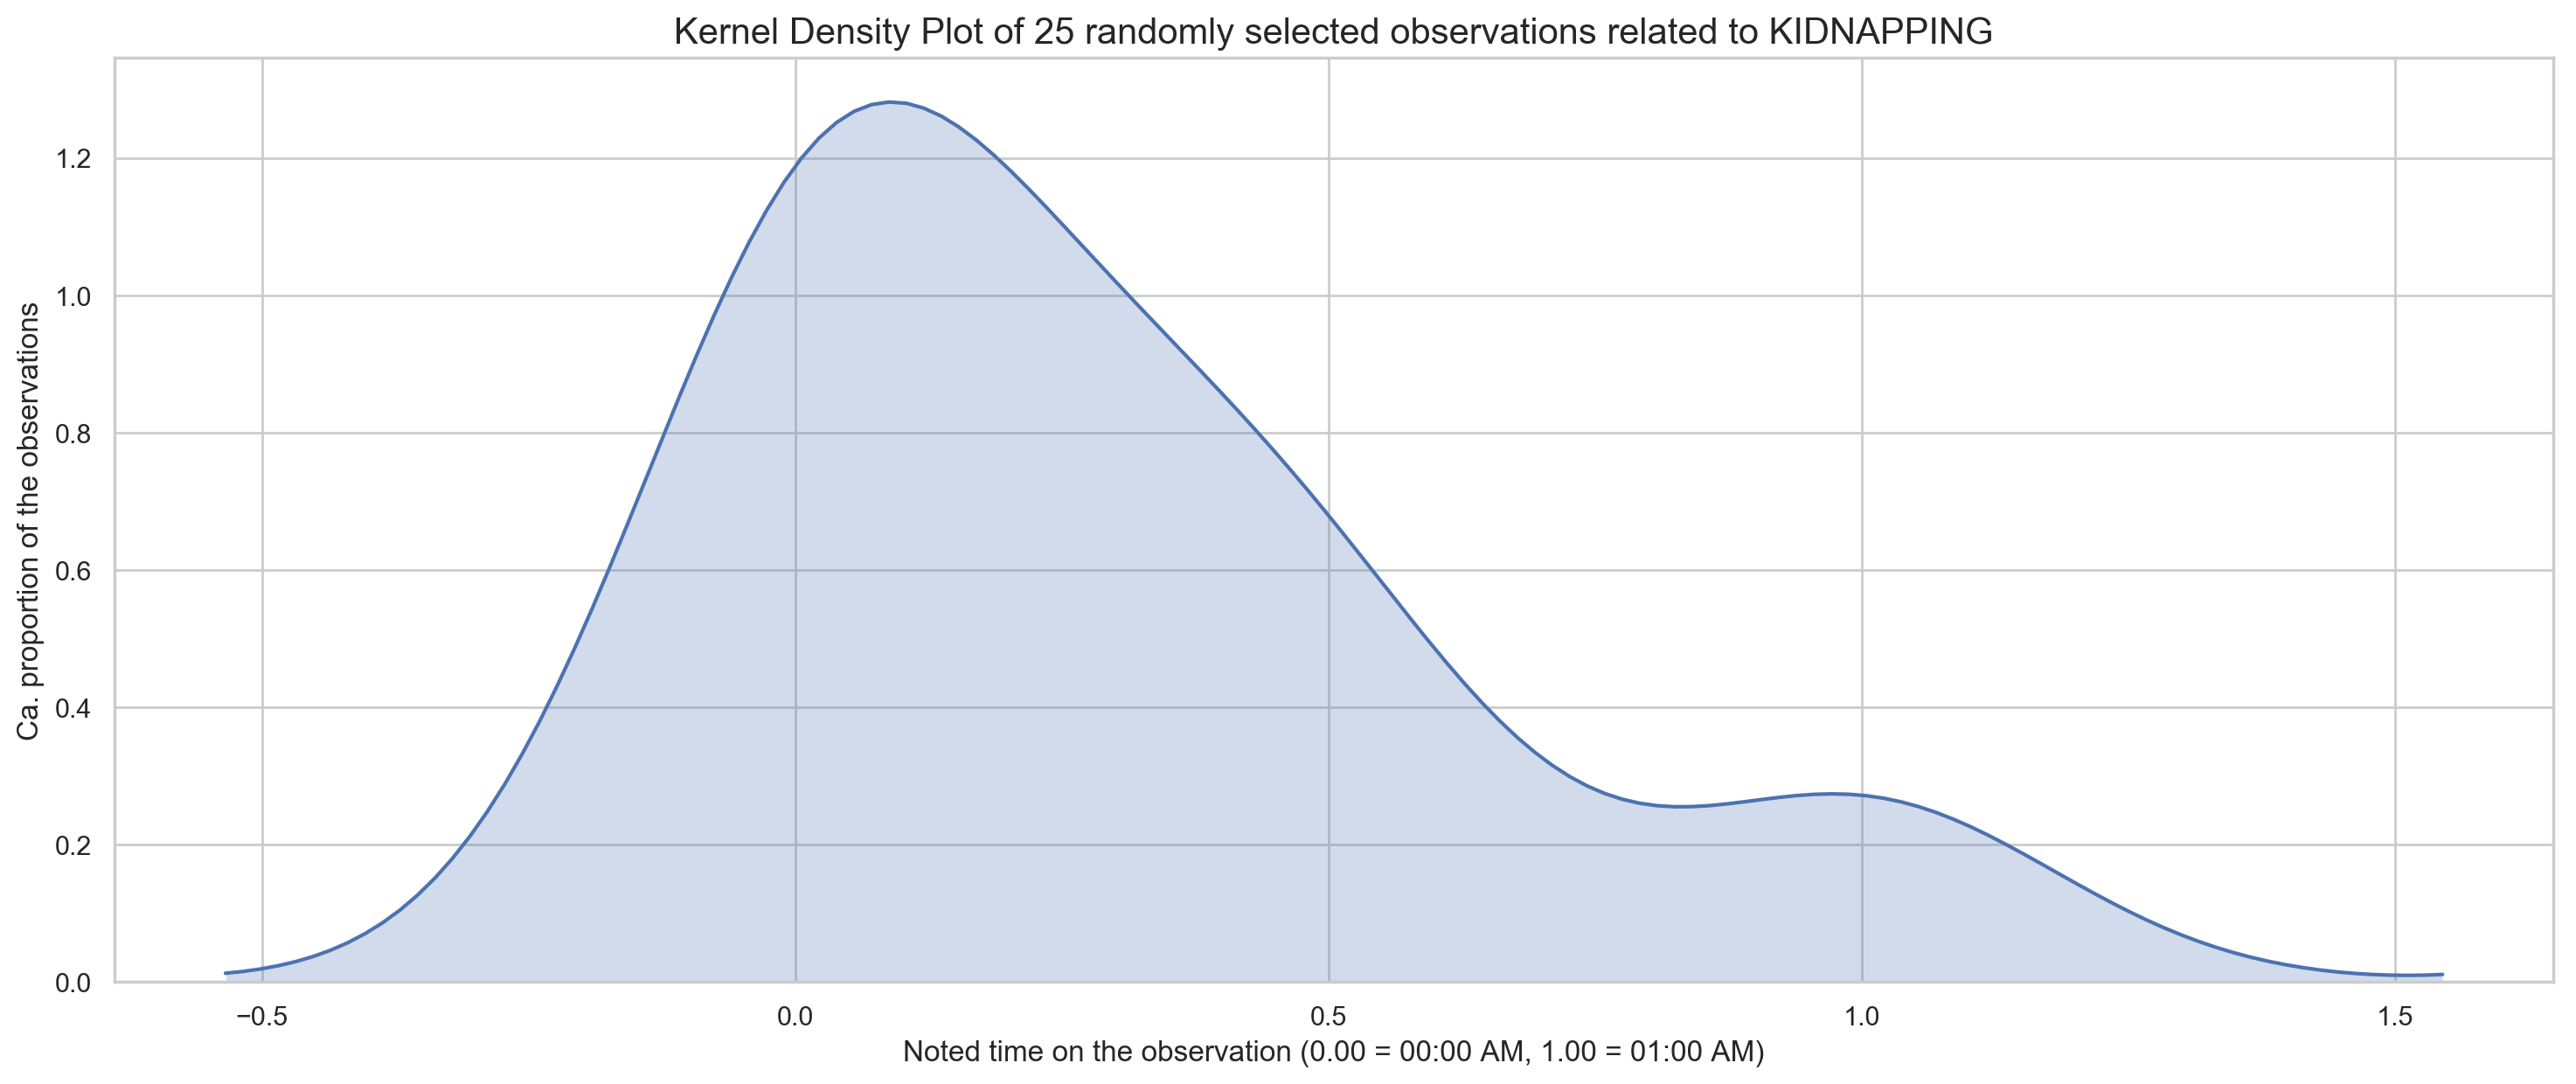

In [60]:
plt.clf # clear figure
plt.figure(figsize = [18, 7], dpi=200)

sns.kdeplot(df_random_samples, shade=True) # replace : with . to allow seaborn to work with the data
plt.title("Kernel Density Plot of 25 randomly selected observations related to KIDNAPPING", size=15)
plt.xlabel("Noted time on the observation (0.00 = 00:00 AM, 1.00 = 01:00 AM)")
plt.ylabel("Ca. proportion of the observations")
plt.show()

_**Due to smoothening, the curve can change drastically when taking a subset and trying to estimate it for the population. This graph is quite different from the one plotted before, as seen in the much smaller difference between the peaks and valley of the curve.**_

***
* **Create your own two versions of _probability plots_, but using the GPS data you used for your version of _GPS-data histogram visualization_, and comment on the results.**

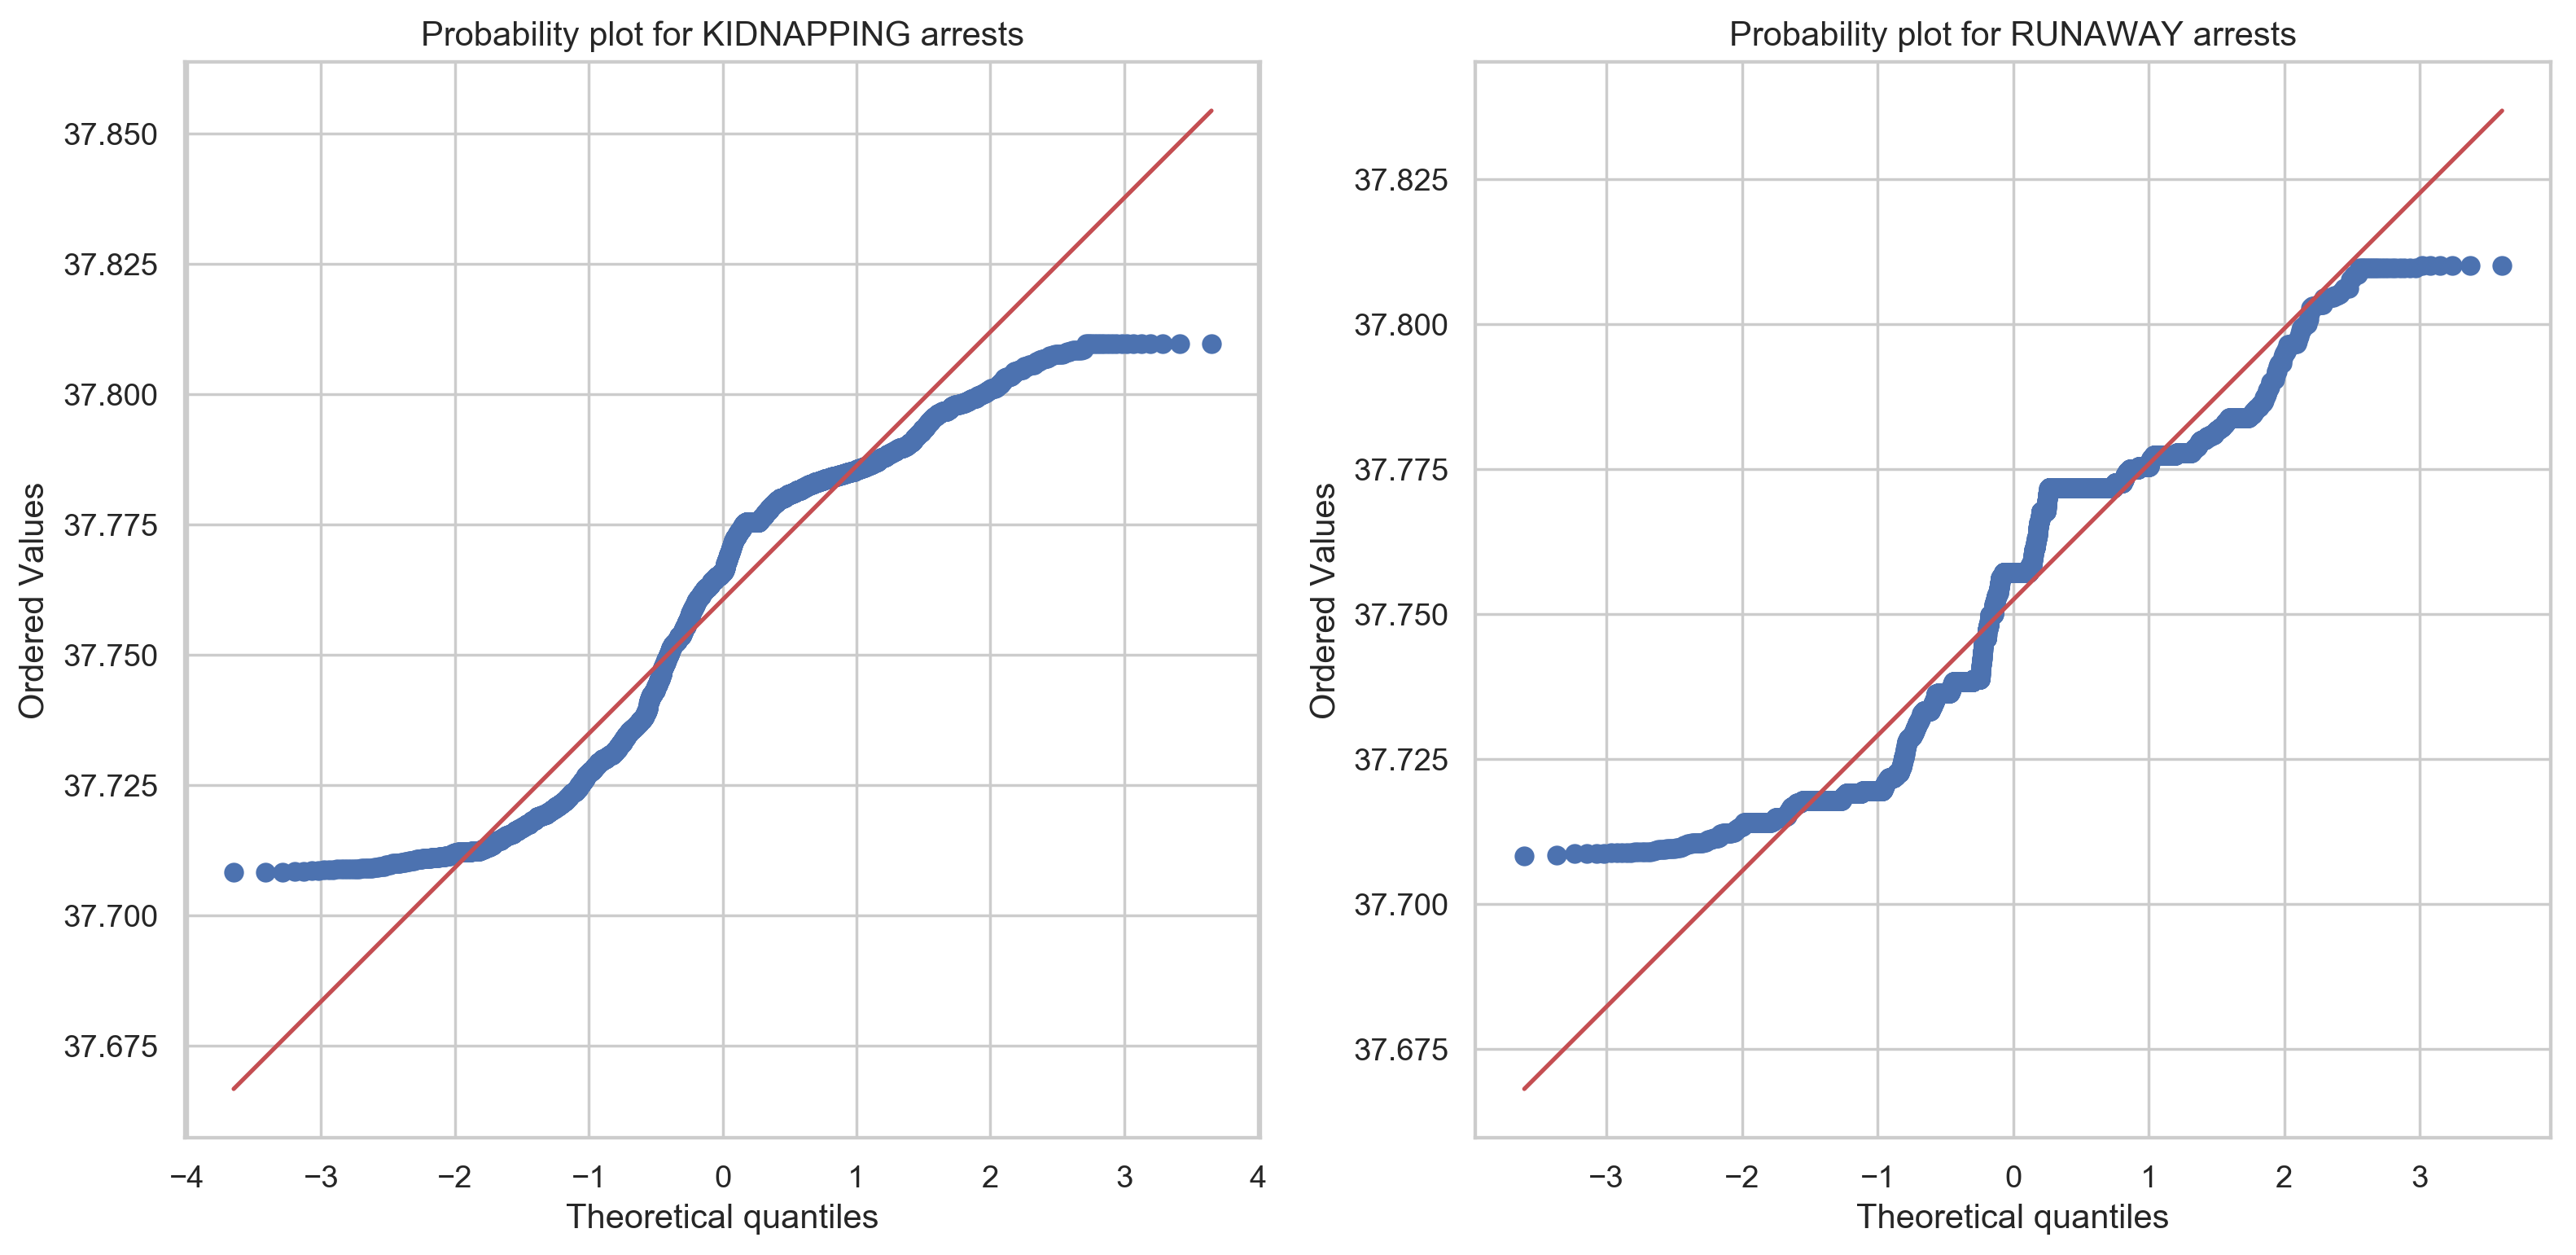

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 7), dpi=250) # multi-column plot
#plt.figure(figsize = [12, 6])

#plt.subplot(121)
stats.probplot(df_kidn_runaw[df_kidn_runaw.Category == 'KIDNAPPING'].Y, plot = axs[0])
axs[0].set_title("Probability plot for KIDNAPPING arrests")
# plt.yticks(np.arange(37.675, 37.825, 0.025))

#plt.subplot(122)
stats.probplot(df_kidn_runaw[df_kidn_runaw.Category == 'RUNAWAY'].Y, plot = axs[1])
axs[1].set_title("Probability plot for RUNAWAY arrests")
# plt.yticks(np.arange(37.675, 37.825, 0.025));

plt.show()

_From the probability plots it is evident that neither of the latitude coordinates for `KIDNAPPING`-related nor `RUNAWAY`-related observations are forming a normal distribution. This is also consistent with the histograms._

***

* **We will now show some box plots. Here, Suneman asks to use the box plots to visualize fluctuations of how many crimes happen per day for the 14 focus crimes:**
    * _For the full time-span of the data, calulate **the number of crimes per day** within each category for the entire duration of the data._
    * _Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side._
    * _What does this plot reveal that you can't see in the plots from last time?_

In [35]:
# add datetime col
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [36]:
df[['IncidntNum', 'Category', 'Date', 'Time', 'Datetime']].head()

,IncidntNum,Category,Date,Time,Datetime
0,150060275,NON-CRIMINAL,01/19/2015,14:00,2015-01-19 14:00:00
1,150098210,ROBBERY,02/01/2015,15:45,2015-02-01 15:45:00
2,150098210,ASSAULT,02/01/2015,15:45,2015-02-01 15:45:00
3,150098210,SECONDARY CODES,02/01/2015,15:45,2015-02-01 15:45:00
4,150098226,VANDALISM,01/27/2015,19:00,2015-01-27 19:00:00


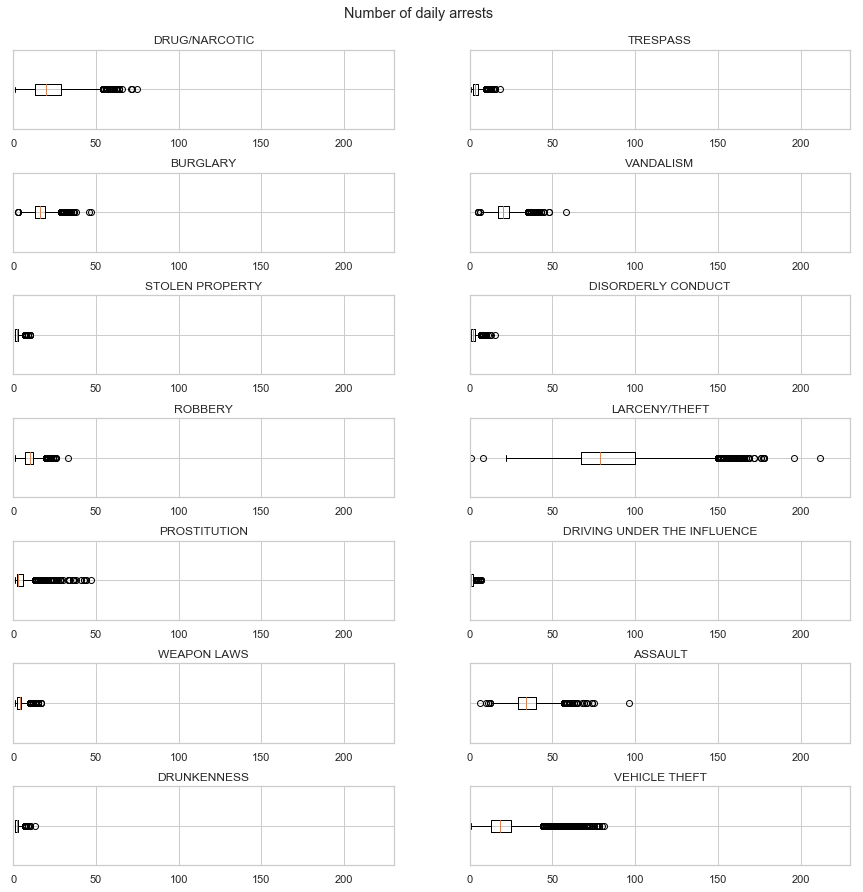

In [37]:
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(15, 15)) # multi-column plot
ax_row = 0 # iterable to change plot placement
ax_col = 0 # iterable to change plot placement
cnt = 0 # counter to control when to change column

for category in focuscrimes:
    pd_category = df.loc[df["Category"] == category]
#     print("Category =>", category)
    #print("row, col =>", ax_row, ax_col) # debugging
    
    category_daily_arrests = pd_category.groupby(['Date']).agg(['count'])['IncidntNum'].values
    #print(category_daily_arrests) # debugging
    
    axs[ax_row][ax_col].boxplot(category_daily_arrests, sym="o", vert=False)
    axs[ax_row][ax_col].set_title(str(category))
    axs[ax_row][ax_col].set_xlim(0, 230) # set x axis range to the same for all plots to make them comparable, value of 230 gotten from larcency/theft, which has the highest daily arrests
    axs[ax_row][ax_col].tick_params(axis="y", which="both", labelleft=False) # remove the '1' on the y axis
    plt.subplots_adjust(hspace = 0.55)
    
    cnt += 1 # increment control counter
    ax_row += 1 # increment the plot placement iterable
    if cnt == 7:
        ax_row = 0 # reset row number
        ax_col = 1 # change column
    
    #break # debugging

fig.suptitle("Number of daily arrests", y = 0.92)
plt.show()

**_These boxplots reveal how big of a fluctuation or spread there is in the daily number of arrests for of the crime categories. Some have a big fluctuation (e.g. `LARCENCY/THEFT`, which spreads from almost 0 to over 200) and some have a small fluctuation (e.g. `ROBBERY`). The crime categories with low fluctuation could be said to happen somewhat consistenly on a daily basis._**

---
<a id='analysis4'></a>
## Analysis 4: Performing Machine Learning using _Decision Trees_ for real-world Crime data

_The idea for this exercise is to pick two crime-types that have *different geographical patterns and different temporal patterns*. We can then use various variables of the real crime data as categories to build a decision tree. I'm thinking we can use:_
* `DayOfWeek` (`Sunday`, ..., `Saturday`). (_Note: Will need to be encoded as integer in `sklearn`_)
* `PD District` (`TENDERLOIN`, etc). (_Note: Will need to be encoded as integer in `sklearn`_)

_And we can extract a few more from the `Time` and `Date` variables:_
* Hour of the day (1-24)
* Month of the year (1-12)

So your job is to **select two crime categories** that (_based on your past three analyses_) have different spatio-temporal patterns. Then we are going to to build is a decision tree (or a random forest) that takes as input the four labels (_Hour-of-the-day, Day-of-the-week, Month-of-the-year, and PD-District_) of some crime (_from one of the two categories_) and then tries to predict which category that crime is from.

<br>
Some notes/hints:

* It is important for your success here to create a balanced dataset, that is, **grab an equal number of examples** from each of the two crime categories. Pick categories with lots of training data. It's probably nice to have something like 10000+ examples of each category to train on.

* Also, I recommend you grab your training data at `random` from the set of all examples, since we want crimes to be distributed equally over time.

* A good option is the `DecisionTreeClassifier`.

* Since you have created a balanced dataset, the baseline performance (random guess) is 50%. How good can your classifier get?

**Consulting the results and visualizations from our notebooks from previous weeks, `PROSTITUTION` and `DRIVING UNDER THE INFLUENCE` seem to be two good candidates.**
<br><br>
*Geographic difference*<br>
From **Analysis 2**, it can easily be reasoned that `PROSTITUTION` happens a lot in `MISSION`. In fact, it is the dominating crime-type in this district. Conversely, `PROSTITUTION` is almost non-existent in `RICHMOND`, where `DRIVING UNDER THE INFLUENCE` prevails highly and is the dominating crime-type.
<br><br>
*Time difference*<br>
From **Analysis 3**, it can easily be deducted that `PROSTITUTION` happens throughout almost the entire day. The same with `DRIVING UNDER THE INFLUENCE`. However, the two crime-types have vastly different medians according to the box-plots. `PROSTITUTION` has a median of roughly 65000 (seconds from midnight = ca. 06:00 PM), while `DRIVING UNDER THE INFLUENCE` has a median of rougly 45000 (seconds from midnight = ca. 00:30 PM). So the median suggests a difference of almost 6 hours,  which coupled with the geographic difference should make the two crime-types quite distinct.

In [38]:
print("number of observations for prostitution =>", df[(df['Category'] == 'PROSTITUTION')].shape[0])
print("number of observations for driving under the influence =>", df[(df['Category'] == 'DRIVING UNDER THE INFLUENCE')].shape[0])

number of observations for prostitution => 16701
number of observations for driving under the influence => 5672


**_However:_**

Checking the number of observations for both crime-types yields the conclusion that `DRIVING UNDER THE INFLUENCE` does not have enough data. Only 5.672 observations, which does not satisfy the requirement of 10.000+ examples.
<br><br>
Therefore, consulting **Analysis 2**, `PARK` is also an area with almost no `PROSTITUTION`, but high rates of all other crime-types. Looking at **Analysis 2** notebook again, `DISORDERLY CONDUCT` seems to differ the most in time from `PROSTITUTION`. 

In [39]:
df[(df['Category'] == 'DISORDERLY CONDUCT')].shape[0]

10040

_**`DISORDERLY CONDUCT` also has *just* enough examples to qualify at 10.040 examples.**_
<br>
_**Resultingly, `DISORDERLY CONDUCT` and `PROSTITUTION` have been chosen as the two crime-types for this exercise.**_

---

In [40]:
df_dc = df.loc[df['Category'] == 'DISORDERLY CONDUCT', ['DayOfWeek', 'PdDistrict', 'Date', 'Time', 'Category']].sample(10000) # get 10.000 random records
df_dc['Month'] = df_dc['Date'].str.split('/').str[0].astype(int)
df_dc['Hour'] = df_dc['Time'].str.split(':').str[0].astype(int)

# encoding of PdDistrict and DayOfWeek columns
df_dc.DayOfWeek = pd.Categorical(df_dc.DayOfWeek) # convert the col to categorial
df_dc.PdDistrict = pd.Categorical(df_dc.PdDistrict) # convert the col to categorial
df_dc['DayCode'] = df_dc.DayOfWeek.cat.codes # make new col with encoded days
df_dc['DistrictCode'] = df_dc.PdDistrict.cat.codes # make new col with encoded districts

print("DISORDERLY CONDUCT")
df_dc.head(3)

DISORDERLY CONDUCT


,DayOfWeek,PdDistrict,Date,Time,Category,Month,Hour,DayCode,DistrictCode
794704,Tuesday,MISSION,02/15/2011,23:45,DISORDERLY CONDUCT,2,23,5,3
1371289,Sunday,SOUTHERN,11/11/2007,21:30,DISORDERLY CONDUCT,11,21,3,7
949757,Tuesday,PARK,09/06/2005,18:50,DISORDERLY CONDUCT,9,18,5,5


In [41]:
df_pr = df.loc[df['Category'] == 'PROSTITUTION', ['DayOfWeek', 'PdDistrict', 'Date', 'Time', 'Category']].sample(10000) # get 10.000 random records
df_pr['Month'] = df_pr['Date'].str.split('/').str[0].astype(int)
df_pr['Hour'] = df_pr['Time'].str.split(':').str[0].astype(int)

# encoding of PdDistrict and DayOfWeek columns
df_pr.DayOfWeek = pd.Categorical(df_pr.DayOfWeek) # convert the col to categorial
df_pr.PdDistrict = pd.Categorical(df_pr.PdDistrict) # convert the col to categorial
df_pr['DayCode'] = df_pr.DayOfWeek.cat.codes # make new col with encoded days
df_pr['DistrictCode'] = df_pr.PdDistrict.cat.codes # make new col with encoded districts

print("PROSTITUTION")
df_pr.head(3)

PROSTITUTION


,DayOfWeek,PdDistrict,Date,Time,Category,Month,Hour,DayCode,DistrictCode
361933,Wednesday,TENDERLOIN,12/05/2012,19:20,PROSTITUTION,12,19,6,9
1314023,Monday,TENDERLOIN,07/30/2007,12:00,PROSTITUTION,7,12,1,9
21165,Tuesday,MISSION,01/21/2014,04:18,PROSTITUTION,1,4,5,3


In [42]:
# extract needed columns as values

# disorderly conduct
df_dc_X_train = df_dc[['Hour', 'DayCode', 'Month', 'DistrictCode']].values # coordinates for training data
df_dc_y_train = df_dc[['Category']].values # labels for training data

# prostitution
df_pr_X_train = df_pr[['Hour', 'DayCode', 'Month', 'DistrictCode']].values # coordinates for training data
df_pr_y_train = df_pr[['Category']].values # labels for training data

In [43]:
# stack the training data together
X_train = np.vstack([df_dc_X_train, df_pr_X_train])
y_train = np.vstack([df_dc_y_train, df_pr_y_train])

In [44]:
clf = tree.DecisionTreeClassifier() # instantiate decision tree classifier
clf = clf.fit(X_train, y_train) # train the model

In [45]:
# get all the unused disorderly conduct rows and use them  as test data

df_dc_rest = df.loc[df['Category'] == 'DISORDERLY CONDUCT', ['DayOfWeek', 'PdDistrict', 'Date', 'Time', 'Category']]
#df_dc_rest.head(2) # debugging
df_dc_joined = df_dc_rest.join(df_dc[['DayOfWeek']], how='left', lsuffix='_left', rsuffix='_right') # join the two dataframes based on index
# df_dc_joined.head(3) # debugging
df_dc_rest = df_dc_joined[df_dc_joined['DayOfWeek_right'].isnull()] # find rows with NaN in DayOfWeek_right

# extracting month and hour
df_dc_rest['Month'] = df_dc_rest['Date'].str.split('/').str[0].astype(int)
df_dc_rest['Hour'] = df_dc_rest['Time'].str.split(':').str[0].astype(int)

# encoding of PdDistrict and DayOfWeek columns
df_dc_rest.DayOfWeek_left = pd.Categorical(df_dc_rest.DayOfWeek_left) # convert the col to categorial
df_dc_rest.PdDistrict = pd.Categorical(df_dc_rest.PdDistrict) # convert the col to categorial
df_dc_rest['DayCode'] = df_dc_rest.DayOfWeek_left.cat.codes # make new col with encoded days
df_dc_rest['DistrictCode'] = df_dc_rest.PdDistrict.cat.codes # make new col with encoded districts

X_test = df_dc_rest[['Hour', 'DayCode', 'Month', 'DistrictCode']].values # put into 2D array

C:\Users\XPS\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\XPS\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\XPS\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [46]:
Z = clf.predict(X_test) # predict the test data

corr = 0
for label in Z:
    if label == 'DISORDERLY CONDUCT':
        corr += 1

print(corr, "correct predictions out of", len(Z), "(" + str((float(corr) / len(Z))*100) + "%" + ")")

36 correct predictions out of 40 (90.0%)


_It seems as though the current created decision tree model predicted the crime-type **correct 90% of the time** based on the 40 unused rows of `DISORDERLY CONDUCT` as test-data. Thus this seems like a really good classifier, but is probably just yielding good results on the test-data due to this run-through being based on a fortunate division of the training- and test-data._